## Instalando e importando

In [1]:
# !pip install plotly
# !pip install requests
# !pip install pandas

import pandas_gbq
import pandas as pd
import requests

import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)

In [5]:

with open("email.html", "r", encoding="utf-8") as handle:
    body = handle.read()


'<html xmlns="http://www.w3.org/1999/xhtml">\n<head>\n\t<meta http-equiv="content-type" content="text/html; charset=utf-8">\n  \t<meta name="viewport" content="width=device-width, initial-scale=1.0;">\n \t<meta name="format-detection" content="telephone=no"/>\n\n\t<!-- Responsive Mobile-First Email Template by Konstantin Savchenko, 2015.\n\thttps://github.com/konsav/email-templates/  -->\n\n\t<style>\n/* Reset styles */ \nbody { margin: 0; padding: 0; min-width: 100%; width: 100% !important; height: 100% !important;}\nbody, table, td, div, p, a { -webkit-font-smoothing: antialiased; text-size-adjust: 100%; -ms-text-size-adjust: 100%; -webkit-text-size-adjust: 100%; line-height: 100%; }\ntable, td { mso-table-lspace: 0pt; mso-table-rspace: 0pt; border-collapse: collapse !important; border-spacing: 0; }\nimg { border: 0; line-height: 100%; outline: none; text-decoration: none; -ms-interpolation-mode: bicubic; }\n#outlook a { padding: 0; }\n.ReadMsgBody { width: 100%; } .ExternalClass { w

# Modelo SIRD - seus resultados

O modelo SIRD tem o seguinte formato:

$$ \frac{dS(t)}{dt} = - \beta S(t)I(t) / N $$
$$ \frac{dI(t)}{dt} = \beta S(t)I(t) / N - r I(t) - \mu I(t) $$
$$ \frac{dR(t)}{dt} = r I(t) $$
$$ \frac{dD(t)}{dt} = \mu I(t) $$

Aplicando nosso algoritmo de aprendizagem heurística, conseguimos extrair os seguintes parâmetros para o modelo:
- $R_o = @$Ro$@$, esse é o número básico de reprodução, que mede quantas pessoas um infectado, em média, infecta.
- $D = @$D$@$, esse é o tempo de recuperação em dias, considerado pelo sistema de saúde.
- $\mu = @$mu$@$, esse é o coeficiente de mortalidade e informa a proporção de mortes diária.
- $pop = @$pop$@$, esse é a proporção estimada da sua população que atenderá ao sistema de saúde.

Você pode recuperar os parâmetros do modelo $r$ e $\beta$, respectivamente como:

In [ ]:
r = 1 / @$D$@
beta = @$pop$@ * @$r$@ / @$Ro$@

print(f"Seu parâmetro beta: {beta}")
print(f"Seu parâmetro r: {r}")

Você também pode analisar a qualidade das previsões de nosso algoritmo, comparando-as com os dados reais coletados de sua região de análise:

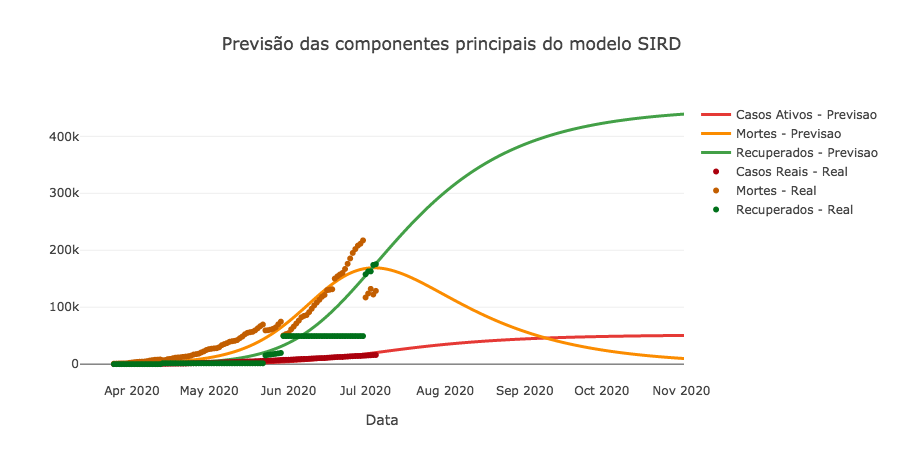

In [2]:

# Adiquirindo os dados e previsões
user_id = 'marcelolafetansee_20200707004330415583'
minha_api = 'https://visual-data-dot-epidemicapp-280600.rj.r.appspot.com'
predicao_api = minha_api + '/predictions?id=' + user_id
dados_reais_api = minha_api + '/real_data?id=' + user_id

r1 = requests.get(predicao_api)
predicao = pd.DataFrame(r1.json())

r2 = requests.get(dados_reais_api)
dados_reais = pd.DataFrame(r2.json())

# Plottando os resultados
fig = go.Figure()
fig.add_trace(go.Scatter(
    name="Casos Ativos - Previsao",
    x=predicao["date"],
    y=predicao['deaths'],
    mode='lines', line_shape='spline',
    line=dict(width=3, color = '#e53935')))
fig.add_trace(go.Scatter(
    name="Mortes - Previsao",
    x=predicao["date"],
    y=predicao['active'],
    mode='lines', line_shape='spline',
    line=dict(width=3, color = '#fb8c00')))
fig.add_trace(go.Scatter(
    name="Recuperados - Previsao",
    x=predicao["date"],
    y=predicao['recovered'],
    mode='lines', line_shape='spline',
    line=dict(width=3, color = '#43a047')))

fig.add_trace(go.Scatter(
    name="Casos Reais - Real",
    x=dados_reais["date"],
    y=dados_reais['deaths'],
    mode='markers', line_shape='spline',
    line=dict(width=3, color = '#ab000d')))
fig.add_trace(go.Scatter(
    name="Mortes - Real",
    x=dados_reais["date"],
    y=dados_reais['active'],
    mode='markers', line_shape='spline',
    line=dict(width=3, color = '#c25e00')))
fig.add_trace(go.Scatter(
    name="Recuperados - Real",
    x=dados_reais["date"],
    y=dados_reais['recovered'],
    mode='markers', line_shape='spline',
    line=dict(width=3, color = '#00701a')))

fig.update_layout(
    template='xgridoff',
    xaxis=dict(showgrid=False),
    xaxis_title='Data',
    title_text="Previsão das componentes principais do modelo SIRD")

iplot(fig)

# Comparando seus resultados com o resto do Brasil

Comparando os seus resultados com todas as regiões do Brasil, nós podemos comparar seus parâmetros com os parâmetros de cada estado e verificar o quão próximo seus dados está de cada região:

In [ ]:
# Obtendo os parâmetros de cada estado

parametros_api = minha_api + '/state_parameters'

r3 = request.get(parametros_api)
est_pars_df = pd.DataFrame(r3.json())
est_lista = est_pars_df["state"].unique().tolist()

# Parametros estimados
R_o = @$Ro$@     # Número básico de reprodução
D   = @$D$@      # Tempo de recuperação
pop = @$pop$@    # Proporção da população que atenderá ao sistema de saúde

# Criando a lista de valores para todos os estados
R_o = [R_o] * len(est_lista)
D   = [D]   * len(est_lista)
pop = [pop] * len(est_lista)

# Plotando os parâmetros
fig = make_subplots(rows=2, cols=1)

fig.add_trace(go.Scatter(
    name="Parametro Ro para cada estado",
    x=est_pars_df["state"],
    y=est_pars_df["Ro"],
    mode='lines', line_shape='spline',
    line=dict(width=3)),
    col=1, row=1)
fig.add_trace(go.Scatter(
    name="Seu valor estimado de Ro",
    x=est_lista,
    y=R_o,
    mode='lines', line_shape='spline',
    line=dict(width=3, dash="dash")),
    col=1, row=1)

fig.add_trace(go.Scatter(
    name="Parametro D para cada estado",
    x=est_pars_df["state"],
    y=est_pars_df["D"],
    mode='lines', line_shape='spline',
    line=dict(width=3)),
    col=1, row=2)
fig.add_trace(go.Scatter(
    name="Seu valor estimado de D",
    x=est_lista,
    y=D,
    mode='lines', line_shape='spline',
    line=dict(width=3, dash="dash")),
    col=1, row=2)

iplot(fig)